In [1]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

#### Load in the dataaset

In [4]:
df = load_boston()

#### Train - Test Split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df.data,df.target,test_size=0.2)
N,D = x_train.shape

#### Scaling is needed for gradient descent to perform faster

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Create Sequential Model Object and call the compile function to compile it.

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1)    
])


model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),
              loss = 'mse')

#### Learning Rate Scheduler

In [13]:
def schedule(epochs,lr):
    if epochs > 50:
        return 0.0001
    else:
        return 0.001
    
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#### Model Fit with epochs = 100 & callbacks = learning rate scheduler object

In [15]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=scheduler)

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 21.7208 - val_loss: 23.9583 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7217 - val_loss: 23.9568 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7292 - val_loss: 23.9558 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7323 - val_loss: 23.9537 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7164 - val_loss: 23.9564 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7120 - val_loss: 23.9564 - lr: 0.0010
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7296 - val_loss: 23.9527 - lr: 0.0010
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7193 - val_loss: 23.9555 - lr: 0.0010
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 21.7232 - val_l

13/13 [==============================] - 0s 2ms/step - loss: 21.6970 - val_loss: 23.9525 - lr: 1.0000e-04
Epoch 72/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6959 - val_loss: 23.9534 - lr: 1.0000e-04
Epoch 73/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6961 - val_loss: 23.9531 - lr: 1.0000e-04
Epoch 74/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6969 - val_loss: 23.9527 - lr: 1.0000e-04
Epoch 75/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6968 - val_loss: 23.9525 - lr: 1.0000e-04
Epoch 76/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6969 - val_loss: 23.9527 - lr: 1.0000e-04
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6970 - val_loss: 23.9524 - lr: 1.0000e-04
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 21.6967 - val_loss: 23.9521 - lr: 1.0000e-04
Epoch 79/100
13/13 [==============================] - 0s 2ms/

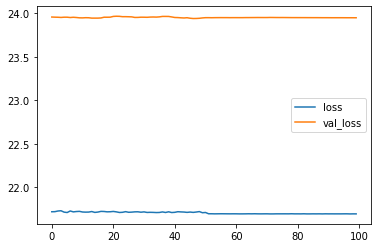

In [17]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers[0]

In [22]:
model.layers[0].get_weights()

[array([[-0.7301635 ],
        [ 0.7922288 ],
        [ 0.05494976],
        [ 0.93141854],
        [-2.1130607 ],
        [ 2.437826  ],
        [ 0.46568567],
        [-2.8182886 ],
        [ 2.3892705 ],
        [-1.917364  ],
        [-1.897253  ],
        [ 0.9431529 ],
        [-4.0634866 ]], dtype=float32),
 array([22.325039], dtype=float32)]